In [88]:
import sys
import argparse
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
debuggers = ['tarantula','crosstab','barinel']


def readJson(jsonFile):
    try:
        with open('testResults/' + jsonFile) as json_data:
            return json.load(json_data)
    except FileNotFoundError:
        print(
            'Error: Could not open JSON result from coverage'
        )
        sys.exit(2)



def start():
    directory = "testResults"
    directoryList = sorted(os.listdir(directory), key=lambda s: s[8:])
    dfTemp = {}
    tempList = []
    crosstab_threshold = 0
    # Initialize Dataframe
    for d in debuggers:
        dfTemp[d] = []
    for f in directoryList:
        resultFile = readJson(str(f))
        debugger = f.split(".")[0].split("_")[2]
        coverage_matrix = resultFile['coverage_matrix']
        dangerStatement = 0
        lineNumber = len(coverage_matrix)
        for result in coverage_matrix:
            if result['suspiciousness'] >= Threshold[debugger]:
                dangerStatement += 1
        metric = dangerStatement / lineNumber
        dfTemp[debugger].append(metric)
    df = pd.DataFrame(dfTemp)
    print(df)
    plt.figure()
    ax = df.plot(figsize=(12,12),grid=True)
    ax.set_title("Evaluation of 3 Debuggers",fontsize=20)
    ax.set_ylabel('Exam Score',fontsize=15)
    ax.set_xlabel('Version of program bugs',fontsize=15)
    ax1 = df.plot(subplots=True,figsize=(13,13),grid=True)
    for obj in ax1:
        obj.set_ylabel('Exam Score',fontsize=12)
        obj.set_xlabel('Version of program bugs',fontsize=12)


    barinel  crosstab  tarantula
0  0.043478  0.652174   0.478261
1  0.043478  0.695652   0.521739
2  0.086957  0.695652   0.521739
3  0.086957  0.695652   0.521739
4  0.130435  0.695652   0.521739
5  0.130435  0.782609   0.608696
6  0.173913  0.739130   0.565217
7  0.217391  0.782609   0.608696
8  0.826087  0.782609   0.000000


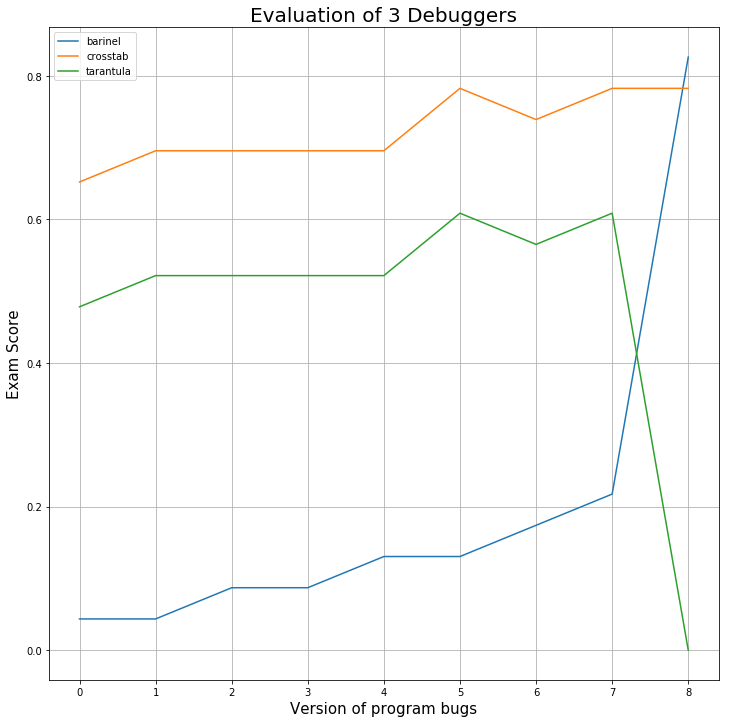

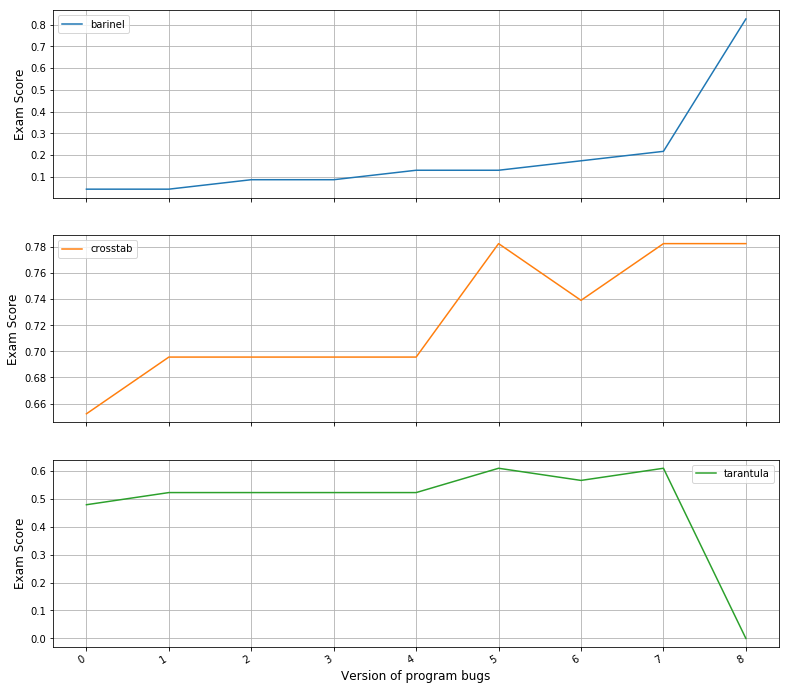

In [92]:
Threshold = {
    'tarantula': 0.5,
    'crosstab': 0,
    'barinel': 1,
}
if __name__ == '__main__':
    start()